# Linear Algebra Assignment

### Question 1
Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("auto-mpg.csv")
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
toyota = data[data['car name'] == 'toyota corona mark ii']
display(toyota)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii


In [5]:
data.info()
data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
path = r"auto-mpg.csv"
df = pd.read_csv(path)

# Fix column names (dataset sometimes has extra spaces)
df.columns = df.columns.str.strip()

# Replace '?' with NaN and convert horsepower to numeric
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)

# Drop rows with missing values
df = df.dropna()

# Select numeric features for similarity
features = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year'
]

X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute cosine similarity matrix
cos_sim = cosine_similarity(X_scaled)

# Find index of Toyota Corona Mark II
target_car = "toyota corona mark ii"
target_index = df[df['car name'].str.lower() == target_car].index[0]

# Get similarity scores
similarity_scores = list(enumerate(cos_sim[target_index]))

# Sort by similarity (descending), exclude itself
similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
similarity_scores = similarity_scores[1:6]  # Top 5 excluding itself

# Fetch similar cars
top_5_similar = df.iloc[[i[0] for i in similarity_scores]][['car name'] + features]

print(top_5_similar)
print(similarity_scores)


                       car name   mpg  cylinders  displacement  horsepower  \
21                  audi 100 ls  24.0          4         107.0        90.0   
18                 datsun pl510  27.0          4          97.0        88.0   
82  toyouta corona mark ii (sw)  23.0          4         120.0        97.0   
31                toyota corona  25.0          4         113.0        95.0   
57        toyota corona hardtop  24.0          4         113.0        95.0   

    weight  acceleration  model year  
21    2430          14.5          70  
18    2130          14.5          70  
82    2506          14.5          72  
31    2228          14.0          71  
57    2278          15.5          72  
[(21, np.float64(0.9940435550842764)), (18, np.float64(0.9756281876003996)), (81, np.float64(0.9748710825193173)), (31, np.float64(0.9724062190390604)), (56, np.float64(0.9708864461686567))]


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load data
path = r"auto-mpg.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip()

# Clean horsepower
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df = df.dropna().reset_index(drop=True)

# Numeric features
features = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year'
]

X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cosine similarity
cos_sim = cosine_similarity(X_scaled)

# Target car
target_car = "toyota corona mark ii"
target_index = df[df['car name'].str.lower() == target_car].index[0]

# Get similarity scores
scores = cos_sim[target_index]

# Create similarity DataFrame
similarity_df = df.copy()
similarity_df['cosine_similarity'] = scores

# Remove the same car and get top 5
result = (
    similarity_df
    .sort_values(by='cosine_similarity', ascending=False)
    .iloc[1:6]
    [['car name', 'cosine_similarity'] + features]
)

print(result)


                       car name  cosine_similarity   mpg  cylinders  \
21                  audi 100 ls           0.994044  24.0          4   
18                 datsun pl510           0.975628  27.0          4   
81  toyouta corona mark ii (sw)           0.974871  23.0          4   
31                toyota corona           0.972406  25.0          4   
56        toyota corona hardtop           0.970886  24.0          4   

    displacement  horsepower  weight  acceleration  model year  
21         107.0        90.0    2430          14.5          70  
18          97.0        88.0    2130          14.5          70  
81         120.0        97.0    2506          14.5          72  
31         113.0        95.0    2228          14.0          71  
56         113.0        95.0    2278          15.5          72  


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data
path = r"auto-mpg.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip()

# Clean horsepower column
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df = df.dropna().reset_index(drop=True)

# Numeric features used for comparison
features = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year'
]

X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Identify target car
target_car = "toyota corona mark ii"
target_index = df[df['car name'].str.lower() == target_car].index[0]

# Target feature vector
target_vector = X_scaled[target_index]

# Mean Squared Error for every car
mse_scores = np.mean((X_scaled - target_vector) ** 2, axis=1)

# Attach MSE to DataFrame
result_df = df.copy()
result_df['mse'] = mse_scores

# Get top 5 most similar cars (lowest MSE, exclude itself)
final_result = (
    result_df
    .sort_values(by='mse', ascending=True)
    .iloc[1:6]
    [['car name', 'mse'] + features]
)

print(final_result)


                 car name       mse   mpg  cylinders  displacement  \
21            audi 100 ls  0.008260  24.0          4         107.0   
31          toyota corona  0.035839  25.0          4         113.0   
48     mercury capri 2000  0.045199  23.0          4         122.0   
18           datsun pl510  0.045575  27.0          4          97.0   
56  toyota corona hardtop  0.048676  24.0          4         113.0   

    horsepower  weight  acceleration  model year  
21        90.0    2430          14.5          70  
31        95.0    2228          14.0          71  
48        86.0    2220          14.0          71  
18        88.0    2130          14.5          70  
56        95.0    2278          15.5          72  


In [29]:
import pandas as pd
import numpy as np

# Load data
path = r"auto-mpg.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip()

# Clean horsepower column
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df = df.dropna().reset_index(drop=True)

# Numeric features (RAW, unscaled)
features = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year'
]

X = df[features].values

# Identify target car
target_car = "toyota corona mark ii"
target_index = df[df['car name'].str.lower() == target_car].index[0]

# Target vector
target_vector = X[target_index]

# Mean Squared Error (RAW FEATURES)
mse_scores = np.mean((X - target_vector) ** 2, axis=1)

# Attach MSE
result_df = df.copy()
result_df['mse'] = mse_scores

# Top 5 most similar (lowest MSE, exclude itself)
final_result = (
    result_df
    .sort_values(by='mse', ascending=True)
    .iloc[1:6]
    [['car name', 'mse'] + features]
)

print(final_result)


                      car name         mse   mpg  cylinders  displacement  \
109                 datsun 610   12.892857  22.0          4         108.0   
22                    saab 99e   13.892857  25.0          4         104.0   
148                     subaru   58.607143  26.0          4         108.0   
79             ford pinto (sw)  100.000000  22.0          4         122.0   
364  chevrolet cavalier 2-door  118.857143  34.0          4         112.0   

     horsepower  weight  acceleration  model year  
109        94.0    2379          16.5          73  
22         95.0    2375          17.5          70  
148        93.0    2391          15.5          74  
79         86.0    2395          16.0          72  
364        88.0    2395          18.0          82  


### Question 2
Find completely unique/orthogonal car to toyota corona mark ii

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load data
path = r"auto-mpg.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip()

# Clean horsepower
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df = df.dropna().reset_index(drop=True)

# Numeric features
features = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year'
]

X = df[features]

# Standardize (mandatory for angle-based comparison)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cosine similarity matrix
cos_sim = cosine_similarity(X_scaled)

# Target car
target_car = "toyota corona mark ii"
target_index = df[df['car name'].str.lower() == target_car].index[0]

# Cosine similarities with target
scores = cos_sim[target_index]

# Exclude self by setting it to +inf
scores[target_index] = np.inf

# Find most orthogonal car (minimum cosine similarity)
orthogonal_index = np.argmin(scores)

# Output result
orthogonal_car = df.loc[orthogonal_index, ['car name'] + features]
orthogonal_similarity = scores[orthogonal_index]

print("Most orthogonal car:")
print(orthogonal_car)
print("\nCosine similarity:", orthogonal_similarity)


Most orthogonal car:
car name        buick century
mpg                      22.4
cylinders                   6
displacement            231.0
horsepower              110.0
weight                   3415
acceleration             15.8
model year                 81
Name: 358, dtype: object

Cosine similarity: -0.9602997655094325


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load data
path = r"auto-mpg.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip()

# Clean horsepower
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df = df.dropna().reset_index(drop=True)

# Numeric features (RAW, UNSCALED)
features = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year'
]

X = df[features].values

# Cosine similarity on RAW features
cos_sim = cosine_similarity(X)

# Target car
target_car = "toyota corona mark ii"
target_index = df[df['car name'].str.lower() == target_car].index[0]

# Similarity scores
scores = cos_sim[target_index]

# Exclude self
scores[target_index] = np.inf

# Most orthogonal = minimum cosine similarity
orthogonal_index = np.argmin(scores)

# Output
orthogonal_car = df.loc[orthogonal_index, ['car name'] + features]
orthogonal_score = scores[orthogonal_index]

print("Most orthogonal car (NO scaling):")
print(orthogonal_car)
print("\nCosine similarity:", orthogonal_score)


Most orthogonal car (NO scaling):
car name        buick estate wagon (sw)
mpg                                14.0
cylinders                             8
displacement                      455.0
horsepower                        225.0
weight                             3086
acceleration                       10.0
model year                           70
Name: 13, dtype: object

Cosine similarity: 0.9945870555870724


### Question 3
Project the data to a 2-dimentional space and visualize using scatter plot

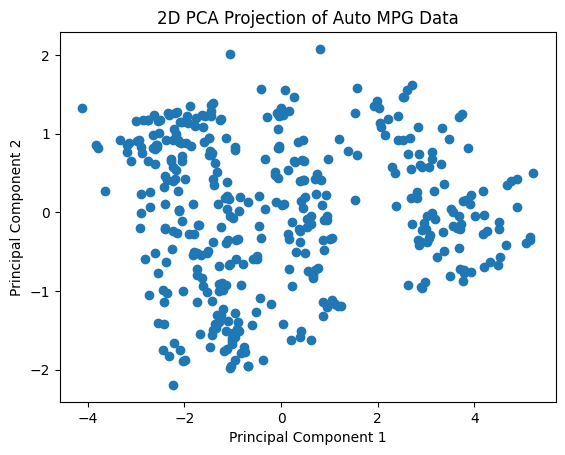

Explained variance ratio: [0.71580512 0.12365591]
Total variance explained: 0.8394610315374587


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
path = r"auto-mpg.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip()

# Clean horsepower
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df = df.dropna().reset_index(drop=True)

# Numeric features
features = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year'
]

X = df[features]

# ---- Scaling (MANDATORY for PCA) ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- PCA to 2 dimensions ----
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# ---- Scatter plot ----
plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Auto MPG Data")
plt.show()

# Explained variance (important)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


### Question 4
Write a function that returns dot product of two list of numbers

In [41]:
# Your code here
def dot_product(a, b):
    if len(a) != len(b):
        raise ValueError("Lists must be of the same length")

    return sum(x * y for x, y in zip(a, b))
a=[7,8]
b=[9,10]
dot_product(a,b)


143

In [42]:
import numpy as np

def dot_product_numpy(a, b):
    return np.dot(a, b)

### Question 5
Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [47]:
# Your code here
def project_a_onto_b(a, b):
    if len(a) != len(b):
        raise ValueError("Vectors must have the same length")

    dot_ab = sum(x * y for x, y in zip(a, b))
    dot_bb = sum(y * y for y in b)

    if dot_bb == 0:
        raise ValueError("Cannot project onto the zero vector")

    scale = dot_ab / dot_bb
    return [scale * y for y in b]

a=[2,6]
b=[4,9]
print(project_a_onto_b(a, b))



[2.556701030927835, 5.752577319587628]


### Question 6
Create a class Vector that supports addition, dot product, and magnitude.

In [48]:
# Your code here
import math

class Vector:
    def __init__(self, values):
        self.values = list(values)

    def __add__(self, other):
        return Vector([a + b for a, b in zip(self.values, other.values)])

    def dot(self, other):
        return sum(a * b for a, b in zip(self.values, other.values))

    def magnitude(self):
        return math.sqrt(sum(x * x for x in self.values))


# ---- USE IT AFTER DEFINITION ----
v1 = Vector([1, 2, 3])
v2 = Vector([4, 5, 6])

print(v1 + v2)
print(v1.dot(v2))
print(v1.magnitude())


32
3.7416573867739413


### Question 7
Write a function that returns the L1 and L2 norms of a vector given as list

In [52]:
import math

def l1_l2_norms(v):
    if not v:
        raise ValueError("Vector cannot be empty")

    l1 = sum(abs(x) for x in v)
    l2 = math.sqrt(sum(x * x for x in v))

    return l1, l2

v = [3, -4, 12]

l1, l2 = l1_l2_norms(v)
print(l1)  # 19
print(l2)  # 13.0



19
13.0


# Task
Find the top 5 cars most similar to 'toyota corona mark ii' from the `auto-mpg.csv` dataset, using both cosine similarity and Mean Squared Error (MSE) as similarity metrics. The final output should include the car names, their cosine similarity scores, and their MSE scores.

## Clean and Convert Horsepower

### Subtask:
Convert the 'horsepower' column to a numeric type, replacing '?' with NaN and filling NaN values with the median of the column.
